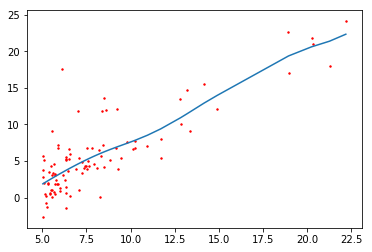

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

def loadDataSet(fileName):

    num_fea=len(open(fileName).readline().split(','))-1 #获得特征的数量
    fr=open(fileName)   #打开文件
    featureArr=[]
    labelArr=[]
    # 读取每一行的数据
    for line in fr.readlines():
        line_fea=[]
        line_data=line.strip().split(',')   #将每一行的数据按照','分隔开（使用什么分隔开看数据本身的构成）
        line_data.insert(0,'1') #将特征进行扩充，将特征矩阵转化为增广矩阵的形式
        for i in range(num_fea+1):
            line_fea.append(float(line_data[i]))    #得到每一行的特征

        featureArr.append(line_fea)
        labelArr.append(float(line_data[-1]))   #得到每一行的标签

    return featureArr,labelArr

# 对于每个测试点求得最佳的theta
def lwlr(testpoint,featureArr,labelArr,k=1.0):
    feature = np.mat(featureArr)
    label = np.mat(labelArr).T
    num_sample = np.size(label)    #确定样本的个数

    weight = np.mat(np.eye(num_sample))   #初始化权重矩阵

    #确定权重
    for i in range(num_sample):
        diffMat = testpoint - feature[i,:]
        weight[i,i] = np.exp((diffMat*diffMat.T)/(-2*k**2))   
    xTwx = feature.T * weight * feature

    if np.linalg.det(xTwx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    theta = xTwx.I * feature.T * weight * label

    return theta

# 使用训练样本来进行测试性能    
def lwlrtest(featureArr,labelArr,k):
    feature = np.mat(featureArr)
    label = np.mat(labelArr)
    num_sample = np.size(feature[:,1])
    predict = np.zeros(num_sample)
    for i in range(num_sample):
        testpoint = feature[i,:]
        theta = lwlr(testpoint,feature,label,k)
        predict[i] = (testpoint * theta)

    return predict


## 主程序
#得到特征以及对应的标签
featureArr,labelArr=loadDataSet('ex1data1.txt')
# 得到训练集预测的结果
k = 2.0
predict = lwlrtest(featureArr,labelArr,k)

# 绘制图像
feature = np.mat(featureArr)
srtInd = feature[:,1].argsort(0)    # 对特征进行排序，得到排序后特征的标签
feature_sort = feature[srtInd][:,0,:]   #得到排序后的特征
label = np.mat(labelArr)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(feature_sort[:,1],predict[srtInd])  #绘制拟合的曲线
ax.scatter(feature[:,1].flatten().A[0],label.T.flatten().A[0],s=2,c='red')